# Assignments 3 Continue Random Walk Simulation 

## Learning Objectives
* Implement concepts in random walk simulation
* Apply a stochastic process to design and create simulations 
* Create, implement, and analyze simulations
* Visualize simulation results using Python

# Introduction

In this assignment, you will revise and extend the drunk simulation we covered in the lecture note on random walking simulation.  You will write class definitions as well as revising and expanding the drunk simulation given in the lecture notes. The below cells contain code covered in our lecture. More specifically, to approach the problems in this assignment, you need to use the class definitions such as ```Location```, ```Field```, ```OddField```, ```Location```, ```Drunk```, ```UsualDrunk``` and ```MasochistDrunk``` from the lecture notes.  Also feel free to reuse and revise any code you copied from the lecture notes.  

You are recommend to run the code cells below before approaching the problems in this assignment.    


In [1]:
import random

In [2]:
class Location(object):
    def __init__(self, x, y):
        """x and y are numbers"""
        self.x = x
        self.y = y

    def move(self, deltaX, deltaY):
        """deltaX and deltaY are numbers"""
        return Location(self.x + deltaX, self.y + deltaY)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def distFrom(self, other):
        xDist = self.x - other.getX()
        yDist = self.y - other.getY()
        return (xDist**2 + yDist**2)**0.5
    
    def __eq__(self, other):
        if isinstance(other, self.__class__):
            return self.x == other.x and self.y == other.y
        return False

    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

In [3]:
class Field(object):
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
            
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        #use move method of Location to get new location
        self.drunks[drunk] = self.drunks[drunk].move(xDist, yDist)
        
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

In [4]:
class OddField(Field):
    def __init__(self, numHoles = 1000,
                 xRange = 100, yRange = 100):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(numHoles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            newX = random.randint(-xRange, xRange)
            newY = random.randint(-yRange, yRange)
            newLoc = Location(newX, newY)
            self.wormholes[(x, y)] = newLoc

    def moveDrunk(self, drunk):
        Field.moveDrunk(self, drunk)
        x = self.drunks[drunk].getX()
        y = self.drunks[drunk].getY()
        if (x, y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x, y)]

In [5]:
class Drunk(object):
    def __init__(self, name = None):
        """Assumes name is a str"""
        self.name = name

    def __str__(self):
        if self != None:
            return self.name
        return 'Anonymous'
    
#The usual drunk who wanders around at random 
class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0,1), (0,-1), (1, 0), (-1, 0)]
        return random.choice(stepChoices)
    
#The masochistdrunk who tries to move northward
class MasochistDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0,1.1), (0.0,-0.9),
                       (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

# Problem 1 Create a SouthDrunk

The first task is to define a ```SouthDrunk``` class that is defined based on the ```Drunk``` class defined in the lecture notes.  From the class, you can create ```SouthDrunk``` objects.  Each SouthDrunk walks southward with probability ```p```, which has the default value 0.15. 

In the skeleton code provided below, the class contains the methods you need to define in the class. If the comment for the method says "do not change," please do **NOT** change it. 

Note that you are expected to define SouthDrunk as a subclass of the Drunk class. 

In [6]:
#The Southdrunk who tries to move southward
class SouthDrunk(Drunk):
    """
    A SouthDrunk is a drunk that will not randomly walk and instead
    walk southward with probability p.
    """

    p = 0.15

    @staticmethod
    def set_south_probability(prob):
        """
        Sets the probability of walking southward equal to prob.

        prob: a float (0 <= prob <= 1)
        """
        SouthDrunk.p = prob
    
    def gets_southward(self):
        """
        Answers the question: Does this SouthDrunk walk southward at this timestep?
        A Southdrunk gets faulty with probability p.

        returns: True if this SouthDrunk walks southward, False otherwise.
        """
        #do not change the given code
        return random.random() < SouthDrunk.p
    
    def takeStep(self):
        """
        If this SouthDrunk walks southward at this step, it returns (0.0, -1.0)
        Otherwise, it randomly steps one step east, west, north, or south.
        That is, the step could by any tuple from 
        [(0.0,1.0), (0.0,-1.0), (1.0, 0.0), (-1.0, 0.0)]
        """
        if self.gets_southward():
            return(0.0, -1.0)
        else:
            return random.choice([(0.0, 1.0), (0.0, -1.0), (1.0, 0.0), (-1.0, 0.0)])
    
#the test code is not complete.  You should add more below    
homer = SouthDrunk('Homer')
homer.takeStep()

(0.0, 1.0)

# Problem 2 Create a Dirty Field 

In the lecture notes, there are two class definitions including ```Field``` and ```OddField``` where drunks can walk. (The definitions of ```Field``` and ```OddField``` are presented in earlier code cells in this document.) For this problem, you need to define a ```DirtyField```. 

In the ```__init__``` method, the ```xRange``` and ```yRange``` values are used to specify the boundaries of the dirty tiles in the field. Each dirty tile should be represented as a Locatioin object.  To create a dirty tile, you should use the below code:
```Python
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            aDirtyTile = Location(x, y)
``` 
This means each dirty tile is a Location object within the boundary in the ```DirtyField``` object.  

The ```dirtyTiles``` is used to denote the number of dirty tiles in the fields. The dirty title Location objects should be different from each other in the same DirtyField. 

Note that drunks don't like dirty tiles. When a drunk moves in the field and happens to touch a dirty tile, the drunk cannot stop the move and would keep moving till he or she is able to step on a clean tile. The sequence of the actions occurred during the move would be counted as a single move action in the dirty field at one time step. 

Below provides some skeleton code for you to extend the two methods defined in ```DirtyField```.

In [7]:
class DirtyField(Field):
    def __init__(self, dirtyTiles = 1000,
                 xRange = 100, yRange = 100):
        Field.__init__(self)
        #more code to add here
        self.dirtyspot = {}
        for i in range(dirtyTiles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            nX = random.randint(-xRange, xRange)
            nY = random.randint(-yRange, yRange)
            nLoc = Location(nX, nY)
            self.dirtyspot[(x,y)] = nLoc
           
    def moveDrunk(self, drunk):
        Field.moveDrunk(self, drunk)
        #more code to add here
        x = self.drunks[drunk].getX()
        y = self.drunks[drunk].getY()
        if (x, y) in self.dirtyspot:
            self.drunks[drunk] = self.dirtyspot[(x, y)]
        

start = Location(0, 0)
f = DirtyField()

homer = SouthDrunk('Homer')
f.addDrunk(homer, start)
f.moveDrunk(homer)
print(f.getLoc(homer))


<0.0, 1.0>


# Problem 3 Create a Walk Simulation

In this problem, you will define a function for a ```SouthDrunk``` to run a number of steps in a ```DirtyField```. In this simulation, you need to create a plot that shows all the places using **blue** color the drunk visited during the walk in the ```DirtyField```. In addition to the visited locations, you also need to mark the dirty tiles **red** in the dirty field.  You should start the walk at location ```(0,0)```.  You may reference the below picture when implementing your plot. 


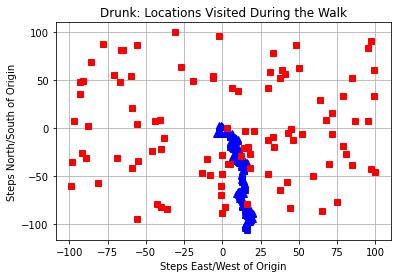

In [8]:
import random
import matplotlib.pyplot as plt 
def runSimulation1(dDrunk, dirtyTiles, xRange, yRange, numSteps):
    """
    Runs a number of steps in a DirtyField. In this simulation, you need to create 
    a plot that shows all the places the drunk visited during the walk in the DirtyField. 
    You could assume that the walk starts at location (0,0).

    The simulation is able to run with any drunk of type dDrunk in a DirtyField
    with the dirtyTiles of tiles that are dirty in the field. 
    The DirtyField is created using dirtyTiles, xRange, and yRange. 
    
    Parameters
    dDrunk: class of drunk walking in the dirty field 
    dirtyTiles: int, number of dirty tiles in the field 
    xRange: int, X boundary from the center in the field
    yRange: int, Y boundary from the center in the field
    numSteps: int, number of steps for the drunk to walk in the field
    """
    startLoc = Location(0,0)
    dirtyField = DirtyField(dirtyTiles, xRange, yRange)
    dirtyField.addDrunk(dDrunk, startLoc)
    
    for step in range(numSteps):
        dirtyField.moveDrunk(dDrunk)
        currentLocation = dirtyField.getLoc(dDrunk)
        plt.plot(currentLocation.getX(), currentLocation.getY(),'^ b')
    
    for dirty in dirtyField.dirtyspot:
        plt.plot(dirty[0], dirty[1], 's r')
        
    plt.xlabel('Steps East/West of Origin')
    plt.ylabel('Steps North/South of Origin')
    plt.title('Drunk: Locations Visited During the Walk')
    plt.grid()
    plt.show()
        
   
#test your function runSimulation1
southDrunk = SouthDrunk()
runSimulation1(southDrunk, 100, 100, 100, 500)


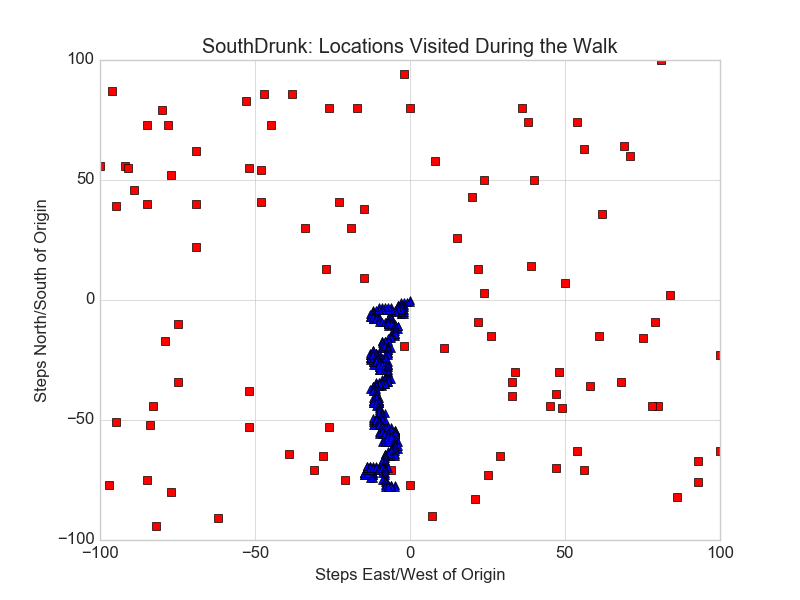

In [9]:
# Run this code cell and check the reference plotted picture

from IPython.core.display import Image 
Image(filename="p3.png")

# Problem 4 Create a Multiple-Walk Simulation

In this problem, you will define a function ```runSimulation2``` that runs ```numTrials``` trials of the multiple-walk simulation by a drunk in ```a DirtyField```.  For each walk simulation, your simulation should print the mean number of distances between the final locations and the start location as well as the maximum and minimum distances between the final locations and the start location across the multiple trials. 

You should start each walk at location ```(0,0)```.  When you define the function ```runSimulation2```, you may need to define several helper functions first and use them to modularize your function definition of ```runSimulation2```.  Please feel free to reuse the code provided in the lecture notebook. If you run the test code following ```runSimlation2``` definition, your output should be similar to the below:

<code>
SouthDrunk random walk of 10 steps
 Mean = 3.199
 Max = 6.3 Min = 0.0
SouthDrunk random walk of 100 steps
 Mean = 15.516
 Max = 28.3 Min = 2.0
SouthDrunk random walk of 1000 steps
 Mean = 153.671
 Max = 223.6 Min = 90.4
SouthDrunk random walk of 10000 steps
 Mean = 1492.849
 Max = 1631.0 Min = 1316.1
SouthDrunk random walk of 10 steps
 Mean = 3.231
 Max = 7.6 Min = 0.0
SouthDrunk random walk of 100 steps
 Mean = 17.092
 Max = 32.6 Min = 3.2
SouthDrunk random walk of 1000 steps
 Mean = 148.874
 Max = 211.0 Min = 95.0
SouthDrunk random walk of 10000 steps
 Mean = 1496.632
 Max = 1696.8 Min = 1310.1
SouthDrunk random walk of 10 steps
 Mean = 3.43
 Max = 8.2 Min = 0.0
SouthDrunk random walk of 100 steps
 Mean = 16.76
 Max = 33.4 Min = 1.4
SouthDrunk random walk of 1000 steps
 Mean = 147.542
 Max = 199.0 Min = 93.3
SouthDrunk random walk of 10000 steps
 Mean = 1491.679
 Max = 1644.5 Min = 1340.0
</code>


In [10]:
def walk(f, dDrunk, numSteps):
    start = f.getLoc(dDrunk)
    for s in range(numSteps):
        f.moveDrunk(dDrunk)
    return start.distFrom(f.getLoc(dDrunk))
    
    
def simWalks(dDrunk, dirtyTiles, xRange, yRange, numTrials, numSteps):
    Homer = dDrunk('Homer')
    origin = Location(0,0)
    distances = []
    for t in range(numTrials):
        f = DirtyField(dirtyTiles, xRange, yRange)
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer, numSteps), 1))
    
    return distances

def runSimulation2(dDrunk, dirtyTiles, xRange, yRange, numTrials, walkLengths):
    """
    Runs num_trials trials of the multiple-walk simulation by a drunk in DirtyField. 
    For each walk, the simulation prints the mean number of distances between the 
    final locations and the start location as well the maximum and minimum distances 
    between the final locations and the start location acorss the multiple trials.
    Each walk starts at location (0,0). 

    The simulation is able to run with any drunk of type dDrunk in a DirtyField
    with the dirty_tiles of tiles that are dirty in the field.
    The DirtyField is created using dirtyTiles, xRange, and yRange.
    
    Parameters
    dDrunk: class of drunk walking in the dirty field 
    dirtyTiles: int, number of dirty tiles in the field 
    xRange: int, X boundary from the center in the field 
    yRange: int, Y boundary from the center in the field
    numTrials: int, number of trials to run the simulation
    walkLengths: a list of steps the drunk walks in the field
    """
    for numSteps in walkLengths:
        distances = simWalks(dDrunk, dirtyTiles, xRange, yRange, numTrials, numSteps)
        print(dDrunk.__name__, 'random walk of', numSteps, 'steps')
        print(' Mean =', round(sum(distances)/len(distances), 4))
        print(' Max =', max(distances), 'Min =', min(distances))
    
southDrunk = SouthDrunk()
runSimulation2(SouthDrunk, 1000, 100, 100, 100, (10, 100, 1000, 10000))
runSimulation2(SouthDrunk, 2000, 100, 100, 100, (10, 100, 1000, 10000))
runSimulation2(SouthDrunk, 3000, 100, 100, 100, (10, 100, 1000, 10000))

SouthDrunk random walk of 10 steps
 Mean = 18.741
 Max = 133.0 Min = 0.0
SouthDrunk random walk of 100 steps
 Mean = 62.912
 Max = 129.7 Min = 6.0
SouthDrunk random walk of 1000 steps
 Mean = 142.397
 Max = 269.3 Min = 16.3
SouthDrunk random walk of 10000 steps
 Mean = 1429.411
 Max = 1757.4 Min = 929.9
SouthDrunk random walk of 10 steps
 Mean = 26.947
 Max = 129.4 Min = 0.0
SouthDrunk random walk of 100 steps
 Mean = 76.091
 Max = 144.7 Min = 5.1
SouthDrunk random walk of 1000 steps
 Mean = 130.521
 Max = 283.2 Min = 16.1
SouthDrunk random walk of 10000 steps
 Mean = 1415.259
 Max = 1669.5 Min = 683.0
SouthDrunk random walk of 10 steps
 Mean = 42.243
 Max = 134.4 Min = 0.0
SouthDrunk random walk of 100 steps
 Mean = 79.874
 Max = 135.1 Min = 8.5
SouthDrunk random walk of 1000 steps
 Mean = 143.103
 Max = 268.5 Min = 15.6
SouthDrunk random walk of 10000 steps
 Mean = 1442.82
 Max = 1689.1 Min = 767.7


In [11]:
import numpy as np
class styleIterator(object):
    def __init__(self, styles):
        self.index = 0
        self.styles = styles

    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result

# Problem 5 Create a Final-Location Simulation

In this problem, you will define a function ```runSimulation3``` that runs numTrials trials of a single-walk simulation by some drunk from any of the ```DrunkKinds``` in a ```DirtyField```. The length of the single-walk simulation must have numSteps. The dirty field must have ```dirtyTiles``` number of dirty tiles which are located randomly within ```fXLimit``` and ```fYLimit``` as the limits of the xy axes.  

For each trial, you should create a new DirtyField and start the drunk at location ```(0,0)```. The simulation should plot the distribution of all of the final locations for the single-walk simulations across the multiple simulation trials.  The plot should also display the the mean numbers of ```(x,y)``` distances between the final locations and the start location ```(0,0)``` across the multiple trials of the single-walks. Your plotted picture should be similar to the picture provided below. 



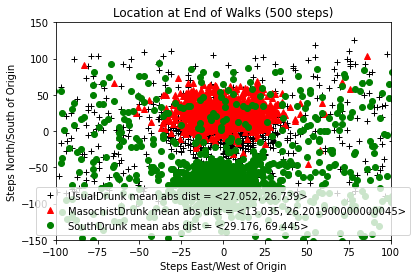

In [12]:
def getFinalLocs(numSteps, numTrials, dirtyTiles, dDrunk, fXLimit, fYLimit):
    locs = []
    d = dDrunk()
    for t in range(numTrials):
        f = DirtyField(dirtyTiles, fXLimit, fYLimit)
        f.addDrunk(d, Location(0,0))
        for s in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs

def runSimulation3(drunkKinds, dirtyTiles, fXLimit, fYLimit, numSteps, numTrials):
    """
    Runs numTrials trials of the single-walk simulation by a drunk from any of the DrunkKinds 
    in a DirtyField that has dirtyTiles number of dirty tiles. The simulation 
    should plot the distribution of the final locations for a single-walk with 
    the number numSteps of steps.  The plot should also display the the mean numbers of (x,y) 
    of distances between the final locations and the start location. 

    Parameters
    drunkKinds: a list of drunk classes  
    dirtyTiles: int, number of dirty tiles in the field 
    fXLimit: int, limit size of xRange in the dirty field
    fYLimit: int, limit size of yRange in the dirty field
    numSteps: int, number of steps to walk in the filed
    numTrials: int, number of trails to do single-walk simulations
    """
    styleChoice = styleIterator(('k+', 'r^', 'go'))
    for dDrunk in drunkKinds:
        locs = getFinalLocs(numSteps, dirtyTiles, numTrials, dDrunk, fXLimit, fYLimit)
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        xVals = np.array(xVals)
        yVals = np.array(yVals)
        meanX = sum(abs(xVals))/len(xVals)
        meanY = sum(abs(yVals))/len(yVals)
        curStyle = styleChoice.nextStyle()
        plt.plot(xVals, yVals, curStyle,
                      label = dDrunk.__name__ +\
                      ' mean abs dist = <'
                      + str(meanX) + ', ' + str(meanY) + '>')
    plt.title('Location at End of Walks ('
                + str(numSteps) + ' steps)')
    plt.ylim(-150, 150)
    plt.xlim(-100, 100)
    plt.xlabel('Steps East/West of Origin')
    plt.ylabel('Steps North/South of Origin')
    plt.legend(loc = 'lower center')
    plt.show()
    

    
         

runSimulation3((UsualDrunk, MasochistDrunk, SouthDrunk), 1000, 100,100, 500, 100)



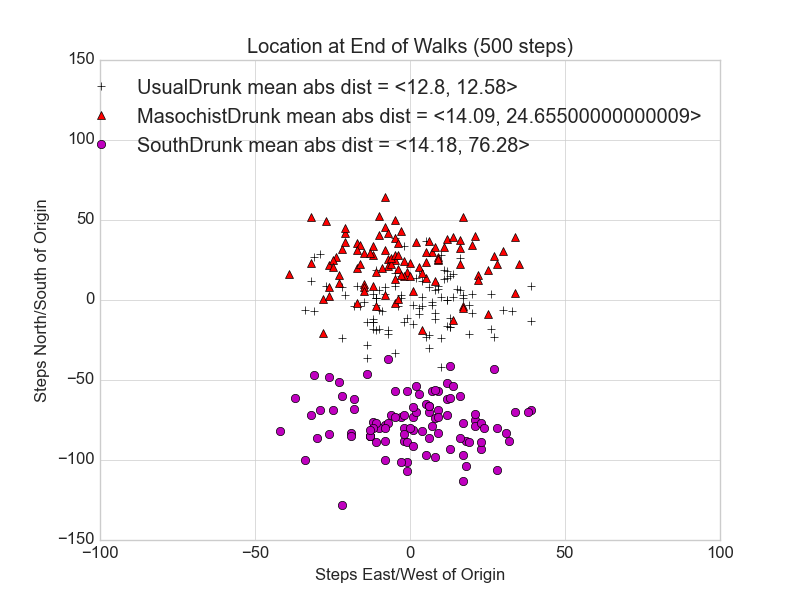

In [13]:
# Run this code cell and check the reference plotted picture

from IPython.core.display import Image 
Image(filename='p5.png')

# Turn-in
You need to turn in at least one file for your submission:

* Your notebook file that contains the code and presentation

* Any other supplementary documents you want to submit to D2L Assignments folder 

You need to package the files into a zip archive and upload the zip file to D2L assignment folder <b>Assignment 3</b>

